In [9]:
from sympy import *
init_printing(use_latex='mathjax')
Re,Da,theta_r,rho,alpha,Hmu4,L_x,lam,tau,k,x = symbols('Re Da theta_r rho alpha Hmu4 L_x lambda tau k x', positive=True)
V0 = symbols('V0')

In [10]:
rho    = solve(Re - rho*sqrt(Hmu4/rho/theta_r)*L_x/Hmu4,rho)[0]     # density from Reynolds number Re
V_p    = sqrt(Hmu4/rho/theta_r)                                     # velocity scale - wave velocity
alpha  = solve(Da - L_x**2*alpha**2/Hmu4,alpha)[0]

In [11]:
V     = V0*exp(-lam*tau*V_p/L_x)*sin(pi*k*x/L_x)
tauxx = V0*exp(-lam*tau*V_p/L_x)*cos(pi*k*x/L_x)

In [12]:
eq1 =     rho*diff(V,tau)      + diff(tauxx,x) + alpha**2*V   # momentum balance
eq2 = theta_r*diff(tauxx,tau)  + tauxx + Hmu4*diff(V,x)    # viscous stress

In [13]:
disp = diff(eq1,tau)*theta_r - diff(eq2,x) + eq1
disp = expand(disp)
disp = expand(simplify(disp/disp.coeff(lam**2)))
disp

     Da⋅λ           2  2    2
Da - ──── - Re⋅λ + π ⋅k  + λ 
      Re                     

In [14]:
sol    = solve(disp,lam)
disc   = discriminant(disp,lam)
Re_opt = solve(disc,Re)[2].subs(k,1)
Re_opt

   _________    
  ╱       2     
╲╱  Da + π   + π

In [17]:
from sympy import maximum, lambdify
import numpy as np
import warnings
warnings.filterwarnings('ignore')
lam       = [re(s.subs(k,1)) for s in sol]
lamf      = lambdify([Re,Da],lam,"numpy")
Ref       = lambdify(Da,Re_opt,"numpy")
Re1       = np.linspace(np.pi/2,16*np.pi,500)
Da1       = np.linspace(0,2000,600)
[Re2,Da2] = np.meshgrid(Re1,Da1)
lam2      = np.stack(lamf(Re2,Da2),axis=0)
lam2      = np.nanmin(lam2,axis=0)
Re_opt1   = Ref(Da1)
lam1      = np.stack(lamf(Re_opt1,Da1),axis=0)
lam1      = np.nanmin(lam1,axis=0)

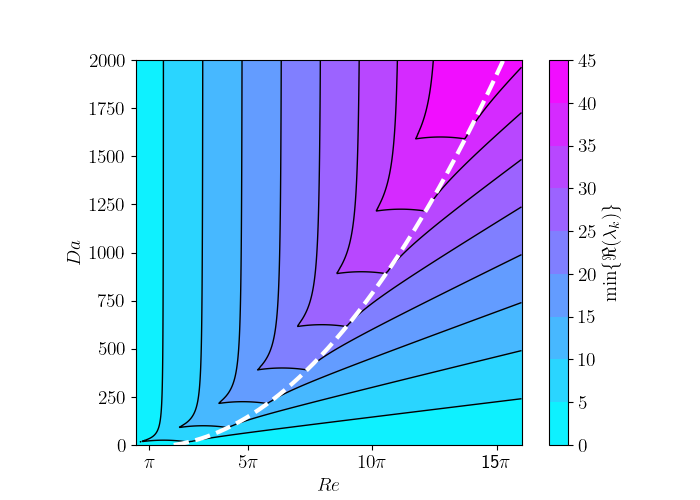

In [18]:
%matplotlib widget
from matplotlib import pyplot as plt
from matplotlib import cm
plt.rcParams.update({"text.usetex": True, "font.size": 14})
f   = plt.figure(figsize=(7,5))
ax  = plt.subplot()
pos = ax.contourf(Re2,Da2,lam2,10,cmap=cm.cool)
ax.contour(Re2,Da2,lam2,10,linewidths=1,colors='k')
ax.plot(Re_opt1,Da1,ls='--',linewidth=3,color='w')
ax.set_xlabel("$Re$"); ax.set_ylabel("$Da$")
ax.set_xticks([np.pi,5*np.pi,10*np.pi,15*np.pi])
ax.set_xticklabels(["$\pi$","$5\pi$","$10\pi$","15$\pi$"])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
cbar = f.colorbar(pos,ax=ax)
cbar.set_label("$\mathrm{min}\{\Re(\lambda_k)\}$")
plt.show()